# 원자재가격과 주가의 관계 분석

### 경희대학교 산업경영공학과 김태호 [Github](https://github.com/hwangtoemat)

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from dateutil.parser import parse
import dateutil

# For Visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

### 데이터 전처리

KOSPI만 선택

In [2]:
item_Charge = pd.read_csv("st_data_itemChargeFull.tsv", sep = '\t')
item_Charge['date'] = item_Charge['date'].apply(str)
item_Charge['date'] = item_Charge['date'].apply(dateutil.parser.parse)
KOSPI = item_Charge.loc[item_Charge[list(item_Charge.columns)[2]]=="KOSPI",:]
KOSPI.head()

,itemcode,itemname,market,date,close_val,change_val,change_rate,acc_quant,debt_total,face_val,...,operating_profit,operating_profit_increasing_rate,prev_quant,property_total,reserve_ratio,roa,roe,sales,sales_increasing_rate,trade_stop_yn
0,000020,동화약품,KOSPI,2015-01-07,5540.0,70.0,1.26,42517.0,732.0,1000,...,112.0,NaN,62744.0,3706.0,967.43,NaN,NaN,3066.0,NaN,N
1,000020,동화약품,KOSPI,2015-01-13,5600.0,40.0,0.71,39527.0,732.0,1000,...,112.0,NaN,62744.0,3706.0,967.43,NaN,NaN,3066.0,NaN,N
2,000020,동화약품,KOSPI,2015-01-16,5640.0,-110.0,-1.95,57341.0,732.0,1000,...,112.0,NaN,62744.0,3706.0,967.43,NaN,NaN,3066.0,NaN,N
3,000020,동화약품,KOSPI,2015-01-19,5680.0,40.0,0.70,49574.0,732.0,1000,...,112.0,NaN,62744.0,3706.0,967.43,NaN,NaN,3066.0,NaN,N
4,000020,동화약품,KOSPI,2015-01-22,5550.0,-60.0,-1.08,77386.0,732.0,1000,...,112.0,NaN,62744.0,3706.0,967.43,NaN,NaN,3066.0,NaN,N


In [3]:
KOSPI_=KOSPI.pivot_table('close_val',index='date',columns='itemname')
KOSPI_clo = KOSPI_.dropna(axis = 1 ).fillna(method='ffill').pct_change().fillna(0)
KOSPI_val = KOSPI_.dropna(axis = 1 ).fillna(method='ffill')
KOSPI_val.head()

itemname,AJ렌터카,AK홀딩스,BGF,BNK금융지주,BYC,BYC우,CJ,CJ CGV,CJ대한통운,CJ씨푸드,...,후성,휠라코리아,휴니드,휴비스,휴스틸,휴켐스,흥국화재,흥국화재2우B,흥국화재우,흥아해운
date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,17750.0,86600.0,74500.0,13500.0,252000.0,168500.0,158500.0,59800.0,183500.0,2595.0,...,3080.0,119000.0,4510.0,11600.0,17350.0,25550.0,3730.0,6140.0,2460.0,2805.0
2015-01-13,17650.0,88000.0,73700.0,14000.0,254000.0,170000.0,161500.0,60500.0,192000.0,2590.0,...,3245.0,118000.0,4820.0,11750.0,17600.0,25200.0,3900.0,6200.0,2465.0,2655.0
2015-01-16,17300.0,92300.0,75100.0,14000.0,252500.0,169000.0,164500.0,59300.0,182000.0,2560.0,...,3215.0,115000.0,4970.0,11800.0,17150.0,26800.0,4230.0,6160.0,2410.0,2710.0
2015-01-19,17250.0,88200.0,75100.0,14250.0,252500.0,170500.0,164500.0,59300.0,182000.0,2540.0,...,3160.0,115500.0,5050.0,11800.0,16850.0,27050.0,4190.0,6300.0,2450.0,2575.0
2015-01-22,17000.0,90300.0,75000.0,13950.0,251000.0,175000.0,168500.0,59600.0,172000.0,2520.0,...,3205.0,116000.0,5090.0,11650.0,16800.0,26800.0,4175.0,6180.0,2495.0,2570.0


In [4]:
st_data_goodsForeign = pd.read_csv("st_data_goodsForeign.tsv", sep = '\t')
st_data_goodsForeign['date'] = st_data_goodsForeign['date'].apply(str)
st_data_goodsForeign['date'] = st_data_goodsForeign['date'].apply(dateutil.parser.parse)
st_data_goodsForeign.head()

,itemcode,itemname,date,close_val,change_val,open_val,high_val,low_val
0,LME@AAY,알루미늄합금,2015-01-07,1790.0,-15.0,1790.0,1790.0,1780.0
1,LME@AAY,알루미늄합금,2015-01-13,1835.0,NaN,1835.0,1835.0,1825.0
2,LME@AAY,알루미늄합금,2015-01-16,1820.0,NaN,1820.0,1820.0,1810.0
3,LME@AAY,알루미늄합금,2015-01-19,1820.0,NaN,1820.0,1820.0,1810.0
4,LME@AAY,알루미늄합금,2015-01-22,1870.0,10.0,1870.0,1870.0,1860.0


In [5]:
goodsForeign=st_data_goodsForeign.pivot_table('close_val',index='date',columns='itemname')
goodsForeign_clo = goodsForeign.fillna(method='ffill').pct_change().fillna(0)
goodsForeign_val = goodsForeign.fillna(method='ffill')
goodsForeign_val.head()

itemname,구리,난방유,납,니켈,대두,대두박,대두유,설탕,소맥,쌀,아연,알루미늄합금,옥수수,주석,천연가스
date,,,,,,,,,,,,,,,
2015-01-07,6170.0,1.6999,1820.0,15455.0,1065.6,368.5,32.98,14.78,579.4,11.410,2145.5,1790.0,411.4,19680.0,2.871
2015-01-13,5915.0,1.6330,1800.5,14780.0,1015.6,349.7,32.39,14.87,548.0,11.240,2083.0,1835.0,400.2,19555.0,2.943
2015-01-16,5660.0,1.6656,1766.5,14360.0,1003.0,326.2,33.39,15.33,532.6,11.325,2056.5,1820.0,401.0,19325.0,3.127
2015-01-19,5671.0,1.6411,1827.5,14400.0,1003.0,326.2,33.39,15.33,532.6,11.325,2068.5,1820.0,401.0,19280.0,2.995
2015-01-22,5742.0,1.6379,1881.5,14720.0,988.6,330.1,31.97,15.91,533.6,11.160,2144.0,1870.0,399.2,19580.0,2.835


In [6]:
TD = pd.concat([KOSPI_val,goodsForeign_val],axis=1)
TD = TD.reset_index().fillna(method='ffill')
for i in range(0,336):
    if i%3 != 0:
        TD.drop( i,inplace = True)
FTD = TD.set_index('date')
FTD.head()

itemname,AJ렌터카,AK홀딩스,BGF,BNK금융지주,BYC,BYC우,CJ,CJ CGV,CJ대한통운,CJ씨푸드,...,대두박,대두유,설탕,소맥,쌀,아연,알루미늄합금,옥수수,주석,천연가스
date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,17750.0,86600.0,74500.0,13500.0,252000.0,168500.0,158500.0,59800.0,183500.0,2595.0,...,368.5,32.98,14.78,579.4,11.410,2145.5,1790.0,411.4,19680.0,2.871
2015-01-19,17250.0,88200.0,75100.0,14250.0,252500.0,170500.0,164500.0,59300.0,182000.0,2540.0,...,326.2,33.39,15.33,532.6,11.325,2068.5,1820.0,401.0,19280.0,2.995
2015-02-03,17350.0,98000.0,85000.0,14450.0,282000.0,171500.0,173000.0,60200.0,200000.0,2525.0,...,340.6,30.80,14.47,513.6,10.385,2146.5,1840.0,401.0,18950.0,2.754
2015-02-12,16500.0,91500.0,88000.0,14450.0,295000.0,170500.0,177500.0,64700.0,197000.0,2600.0,...,330.5,32.01,15.04,521.2,10.330,2129.5,1785.0,398.2,17900.0,2.713
2015-02-27,16800.0,101000.0,89800.0,14900.0,304500.0,186500.0,173500.0,64300.0,181000.0,2610.0,...,353.7,32.80,13.77,517.4,10.470,2060.5,1800.0,401.2,17920.0,2.734


In [7]:
del TD['date']
TD.head()
corr = TD.corr(method = 'pearson')
corr_TD = corr.iloc[:-16,-15:]
corr_TD.head()

itemname,구리,난방유,납,니켈,대두,대두박,대두유,설탕,소맥,쌀,아연,알루미늄합금,옥수수,주석,천연가스
itemname,,,,,,,,,,,,,,,
AJ렌터카,0.253434,0.357430,-0.180675,0.491654,-0.115987,0.033026,-0.198628,-0.551920,0.578182,0.134875,-0.117926,0.354760,0.391342,-0.238737,0.049452
AK홀딩스,0.284143,0.319556,-0.028906,0.572011,0.177118,0.423597,-0.119239,-0.449531,0.480114,0.331932,-0.006332,0.668936,0.434461,-0.125864,-0.080484
BGF,-0.840062,-0.796421,-0.665365,-0.663681,0.135000,-0.171780,0.112896,0.434287,-0.213475,-0.261622,-0.742201,-0.237837,0.009903,-0.649587,-0.506187
BNK금융지주,0.085814,0.101259,-0.238705,0.352453,0.075016,0.130878,-0.052747,-0.365024,0.446003,0.125338,-0.264136,0.536734,0.446926,-0.389719,-0.135423
BYC,-0.787079,-0.844172,-0.445330,-0.739622,0.107104,-0.327591,0.282540,0.573646,-0.448948,-0.358966,-0.559299,-0.355283,-0.213558,-0.434541,-0.579782


## 데이터 시각화

### 원자재 가격과 양의 상관관계를 갖는 주식

In [8]:
corr_TD.iloc[:,0].sort_values(ascending=False).head()

itemname
POSCO     0.890243
SK하이닉스    0.885247
하나금융지주    0.865733
NH투자증권    0.858859
KB금융      0.854524
Name: 구리, dtype: float64

In [9]:
from sklearn import preprocessing

col = ['POSCO', 'SK하이닉스', '하나금융지주', 'NH투자증권', 'KB금융', '구리']

x = FTD[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
cu = pd.DataFrame(x_scaled, columns = col, index = FTD.index)

cu.head()

,POSCO,SK하이닉스,하나금융지주,NH투자증권,KB금융,구리
date,,,,,,
2015-01-07,0.546296,0.330261,0.309278,0.155107,0.154161,0.644206
2015-01-19,0.513889,0.324117,0.371134,0.274905,0.195089,0.471332
2015-02-03,0.428241,0.319508,0.344624,0.274905,0.234652,0.479647
2015-02-12,0.462963,0.318740,0.243004,0.306431,0.203274,0.479647
2015-02-27,0.490741,0.317972,0.284242,0.438840,0.263302,0.543911


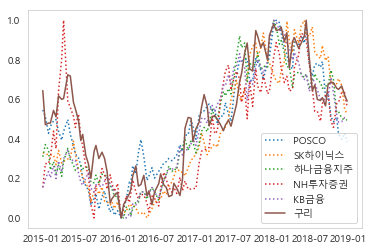

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(cu['POSCO'],ls = ":", label = 'POSCO')
plt.plot(cu['SK하이닉스'],ls = ":", label = 'SK하이닉스')
plt.plot(cu['하나금융지주'],ls = ":", label = '하나금융지주')
plt.plot(cu['NH투자증권'],ls = ":", label = 'NH투자증권')
plt.plot(cu['KB금융'],ls = ":", label = 'KB금융')
plt.plot(cu['구리'], label = '구리')

plt.legend(loc = 'best')
plt.grid()
plt.show()
plt.savefig('구리.jpg')

In [11]:
corr_TD.iloc[:,1].sort_values(ascending=False).head()

itemname
금호석유      0.849365
신대양제지     0.792479
SK하이닉스    0.788649
LS산전      0.786274
KG케미칼     0.779705
Name: 난방유, dtype: float64

In [12]:
from sklearn import preprocessing

col = ['금호석유', '신대양제지', 'SK하이닉스', 'LS산전', 'KG케미칼', '난방유']

x = FTD[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
cu = pd.DataFrame(x_scaled, columns = col, index = FTD.index)

cu.head()

,금호석유,신대양제지,SK하이닉스,LS산전,KG케미칼,난방유
date,,,,,,
2015-01-07,0.508148,0.141916,0.330261,0.486553,0.241379,0.524168
2015-01-19,0.555556,0.112575,0.324117,0.545232,0.295977,0.483911
2015-02-03,0.629630,0.143713,0.319508,0.545232,0.218391,0.624538
2015-02-12,0.540741,0.159880,0.318740,0.559902,0.178161,0.670546
2015-02-27,0.551111,0.171257,0.317972,0.579462,0.221264,0.711625


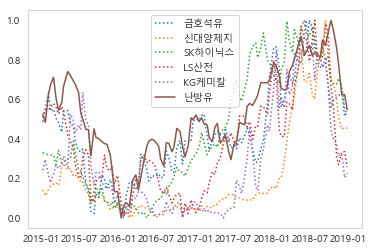

In [13]:
plt.plot(cu['금호석유'],ls = ":", label = '금호석유')
plt.plot(cu['신대양제지'],ls = ":", label = '신대양제지')
plt.plot(cu['SK하이닉스'],ls = ":", label = 'SK하이닉스')
plt.plot(cu['LS산전'],ls = ":", label = 'LS산전')
plt.plot(cu['KG케미칼'],ls = ":", label = 'KG케미칼')
plt.plot(cu['난방유'], label = '난방유')

plt.legend(loc = 'best')
plt.grid()
plt.show()

In [14]:
corr_TD.iloc[:,13].sort_values(ascending=False).head()

itemname
카프로      0.838551
LS       0.837574
이구산업     0.816536
POSCO    0.803074
황금에스티    0.779738
Name: 주석, dtype: float64

In [15]:
from sklearn import preprocessing

col = ['카프로', 'LS', '이구산업', 'POSCO', '황금에스티', '주석']

x = FTD[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
cu = pd.DataFrame(x_scaled, columns = col, index = FTD.index)

cu.head()

,카프로,LS,이구산업,POSCO,황금에스티,주석
date,,,,,,
2015-01-07,0.061184,0.410669,0.062035,0.546296,0.024415,0.741765
2015-01-19,0.218421,0.347163,0.064516,0.513889,0.000000,0.694706
2015-02-03,0.179605,0.359018,0.096774,0.428241,0.018820,0.655882
2015-02-12,0.187500,0.332769,0.114144,0.462963,0.034588,0.532353
2015-02-27,0.228947,0.402202,0.168734,0.490741,0.072228,0.534706


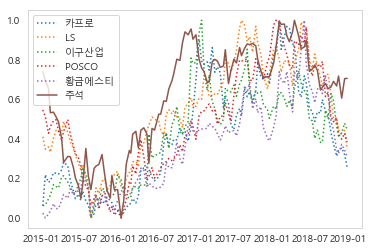

In [16]:
plt.plot(cu['카프로'],ls = ":", label = '카프로')
plt.plot(cu['LS'],ls = ":", label = 'LS')
plt.plot(cu['이구산업'],ls = ":", label = '이구산업')
plt.plot(cu['POSCO'],ls = ":", label = 'POSCO')
plt.plot(cu['황금에스티'],ls = ":", label = '황금에스티')
plt.plot(cu['주석'], label = '주석')

plt.legend(loc = 'best')
plt.grid()
plt.show()

### 원자재 가격과 음의 상관관계를 갖는 주식

In [17]:
corr_TD.iloc[:,0].sort_values(ascending=True).head()

itemname
미래아이앤지   -0.871926
BGF      -0.840062
CJ대한통운   -0.820994
한국전력     -0.798898
하이트론     -0.793636
Name: 구리, dtype: float64

In [18]:
col = ['미래아이앤지', 'BGF', 'CJ대한통운', '한국전력', '하이트론', '구리']

x = FTD[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
cu = pd.DataFrame(x_scaled, columns = col, index = FTD.index)

cu.head()

,미래아이앤지,BGF,CJ대한통운,한국전력,하이트론,구리
date,,,,,,
2015-01-07,0.401904,0.306223,0.547739,0.483740,0.279188,0.644206
2015-01-19,0.381209,0.308971,0.532663,0.379404,0.231810,0.471332
2015-02-03,0.401904,0.354307,0.713568,0.460705,0.200508,0.479647
2015-02-12,0.354305,0.368045,0.683417,0.531165,0.370558,0.479647
2015-02-27,0.377070,0.376288,0.522613,0.525745,0.494078,0.543911


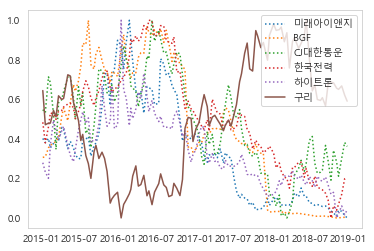

In [19]:
plt.plot(cu['미래아이앤지'],ls = ":", label = '미래아이앤지')
plt.plot(cu['BGF'],ls = ":", label = 'BGF')
plt.plot(cu['CJ대한통운'],ls = ":", label = 'CJ대한통운')
plt.plot(cu['한국전력'],ls = ":", label = '한국전력')
plt.plot(cu['하이트론'],ls = ":", label = '하이트론')
plt.plot(cu['구리'], label = '구리')

plt.legend(loc = 'best')
plt.grid()
plt.show()

In [20]:
corr_TD.iloc[:,1].sort_values(ascending=True).head()

itemname
BYC      -0.844172
NPC      -0.827650
동성화학     -0.823397
조일알미늄    -0.821647
미래아이앤지   -0.814216
Name: 난방유, dtype: float64

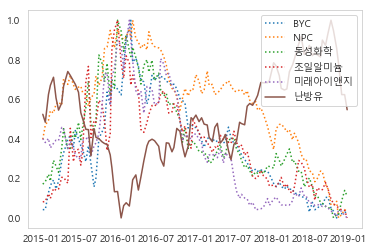

In [21]:
col = ['BYC', 'NPC', '동성화학', '조일알미늄', '미래아이앤지', '난방유']

x = FTD[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
cu = pd.DataFrame(x_scaled, columns = col, index = FTD.index)

plt.plot(cu['BYC'],ls = ":", label = 'BYC')
plt.plot(cu['NPC'],ls = ":", label = 'NPC')
plt.plot(cu['동성화학'],ls = ":", label = '동성화학')
plt.plot(cu['조일알미늄'],ls = ":", label = '조일알미늄')
plt.plot(cu['미래아이앤지'],ls = ":", label = '미래아이앤지')
plt.plot(cu['난방유'], label = '난방유')

plt.legend(loc = 'best')
plt.grid()
plt.show()

In [22]:
corr_TD.iloc[:,13].sort_values(ascending=True).head()

itemname
한세예스24홀딩스   -0.901462
쿠쿠홀딩스       -0.885435
S&T홀딩스      -0.884960
전방          -0.870637
사조해표        -0.868335
Name: 주석, dtype: float64

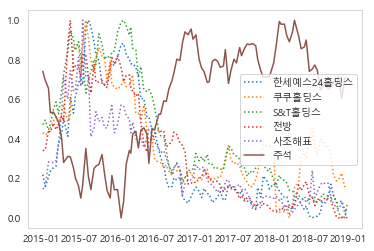

In [23]:
col = ['한세예스24홀딩스', '쿠쿠홀딩스', 'S&T홀딩스', '전방', '사조해표', '주석']

x = FTD[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
cu = pd.DataFrame(x_scaled, columns = col, index = FTD.index)

plt.plot(cu['한세예스24홀딩스'],ls = ":", label = '한세예스24홀딩스')
plt.plot(cu['쿠쿠홀딩스'],ls = ":", label = '쿠쿠홀딩스')
plt.plot(cu['S&T홀딩스'],ls = ":", label = 'S&T홀딩스')
plt.plot(cu['전방'],ls = ":", label = '전방')
plt.plot(cu['사조해표'],ls = ":", label = '사조해표')
plt.plot(cu['주석'], label = '주석')

plt.legend(loc = 'best')
plt.grid()
plt.show()